### Problem Statement 1
A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply. You are a data scientist, who has to
come up with useful insights using the data and make prediction models to forecast the sales for
X number of months/years.

#### Project Objective

Retrieve Useful insights from the data and make prediction models to forecast the sales for X number of months/years

#### Data Description

### Data Pre-Processing

##### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading dataset

data = pd.read_csv("Walmart.csv")
data

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [3]:
data.shape # shape of the dataset

(6435, 8)

In [4]:
data.index # index

RangeIndex(start=0, stop=6435, step=1)

In [5]:
data["Month"] = pd.DatetimeIndex(data["Date"]).month #Taking a separate column month

In [6]:
data["Year"] = pd.DatetimeIndex(data["Date"]).year #Taking a separate column year

In [7]:
# data.drop("Date", inplace = True, axis = 1) #Dropping Date column (no need)

In [8]:
data #according to need

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  Month  Year  
0     211.096358         8.106      5  2010  
1     211.242170         8.106     12  2010  
2     211.289143         8.106      2  2010  
3     211.319643         8.106      2  2010  
4     211.350143         8.106      5  2010  
...          ...           ...    ...   ...  
6430  192.013558         8.684      9  2012  
6431  192.170412         8.667      5  2012  
6432  192.327265         8.667     12  2012  
6433  192.330854         8.667     10  2012  
6434  192.308899         8.667     10  2012  

[6435 rows x 10 columns]

In [9]:
data.isnull().sum() #Checking null values in the dataset

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Month           0
Year            0
dtype: int64

### Observation 

No null values

In [10]:
# data['Date'] = pd.to_numeric(data['Date'], errors = 'coerce')
# data['Date']

In [11]:
# Target variable and trainnig data

X = data[['Month', 'Year', 'Fuel_Price']]
Y = data['Weekly_Sales']

In [12]:
# X
Y

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64

In [13]:
# Dividing the data into training and testing (80% training and 20 % test data)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)

y_test = np.array(y_test) # Converting the test values in the numpy for further formatting in the data

In [14]:
X_train.shape ,X_test.shape ,y_train.shape  , y_test.shape # Training and testing data shapes

((5148, 3), (1287, 3), (5148,), (1287,))

###  Choosing the Algorithm for the Project

#### I am choosing the Linear Regression algorithm for the project

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [16]:
print('Linear Regression Algorithm Training accuracy of the model :', lin_model.score(X_train, y_train))

Linear Regression Algorithm Training accuracy of the model : 0.007644344245419932


In [17]:
lin_preds = lin_model.predict(X_test)

In [18]:
lin_preds

array([1124412.38943674, 1040606.73493558, 1099948.4606735 , ...,
       1036036.9833013 , 1093693.65915714, 1083772.9080191 ])

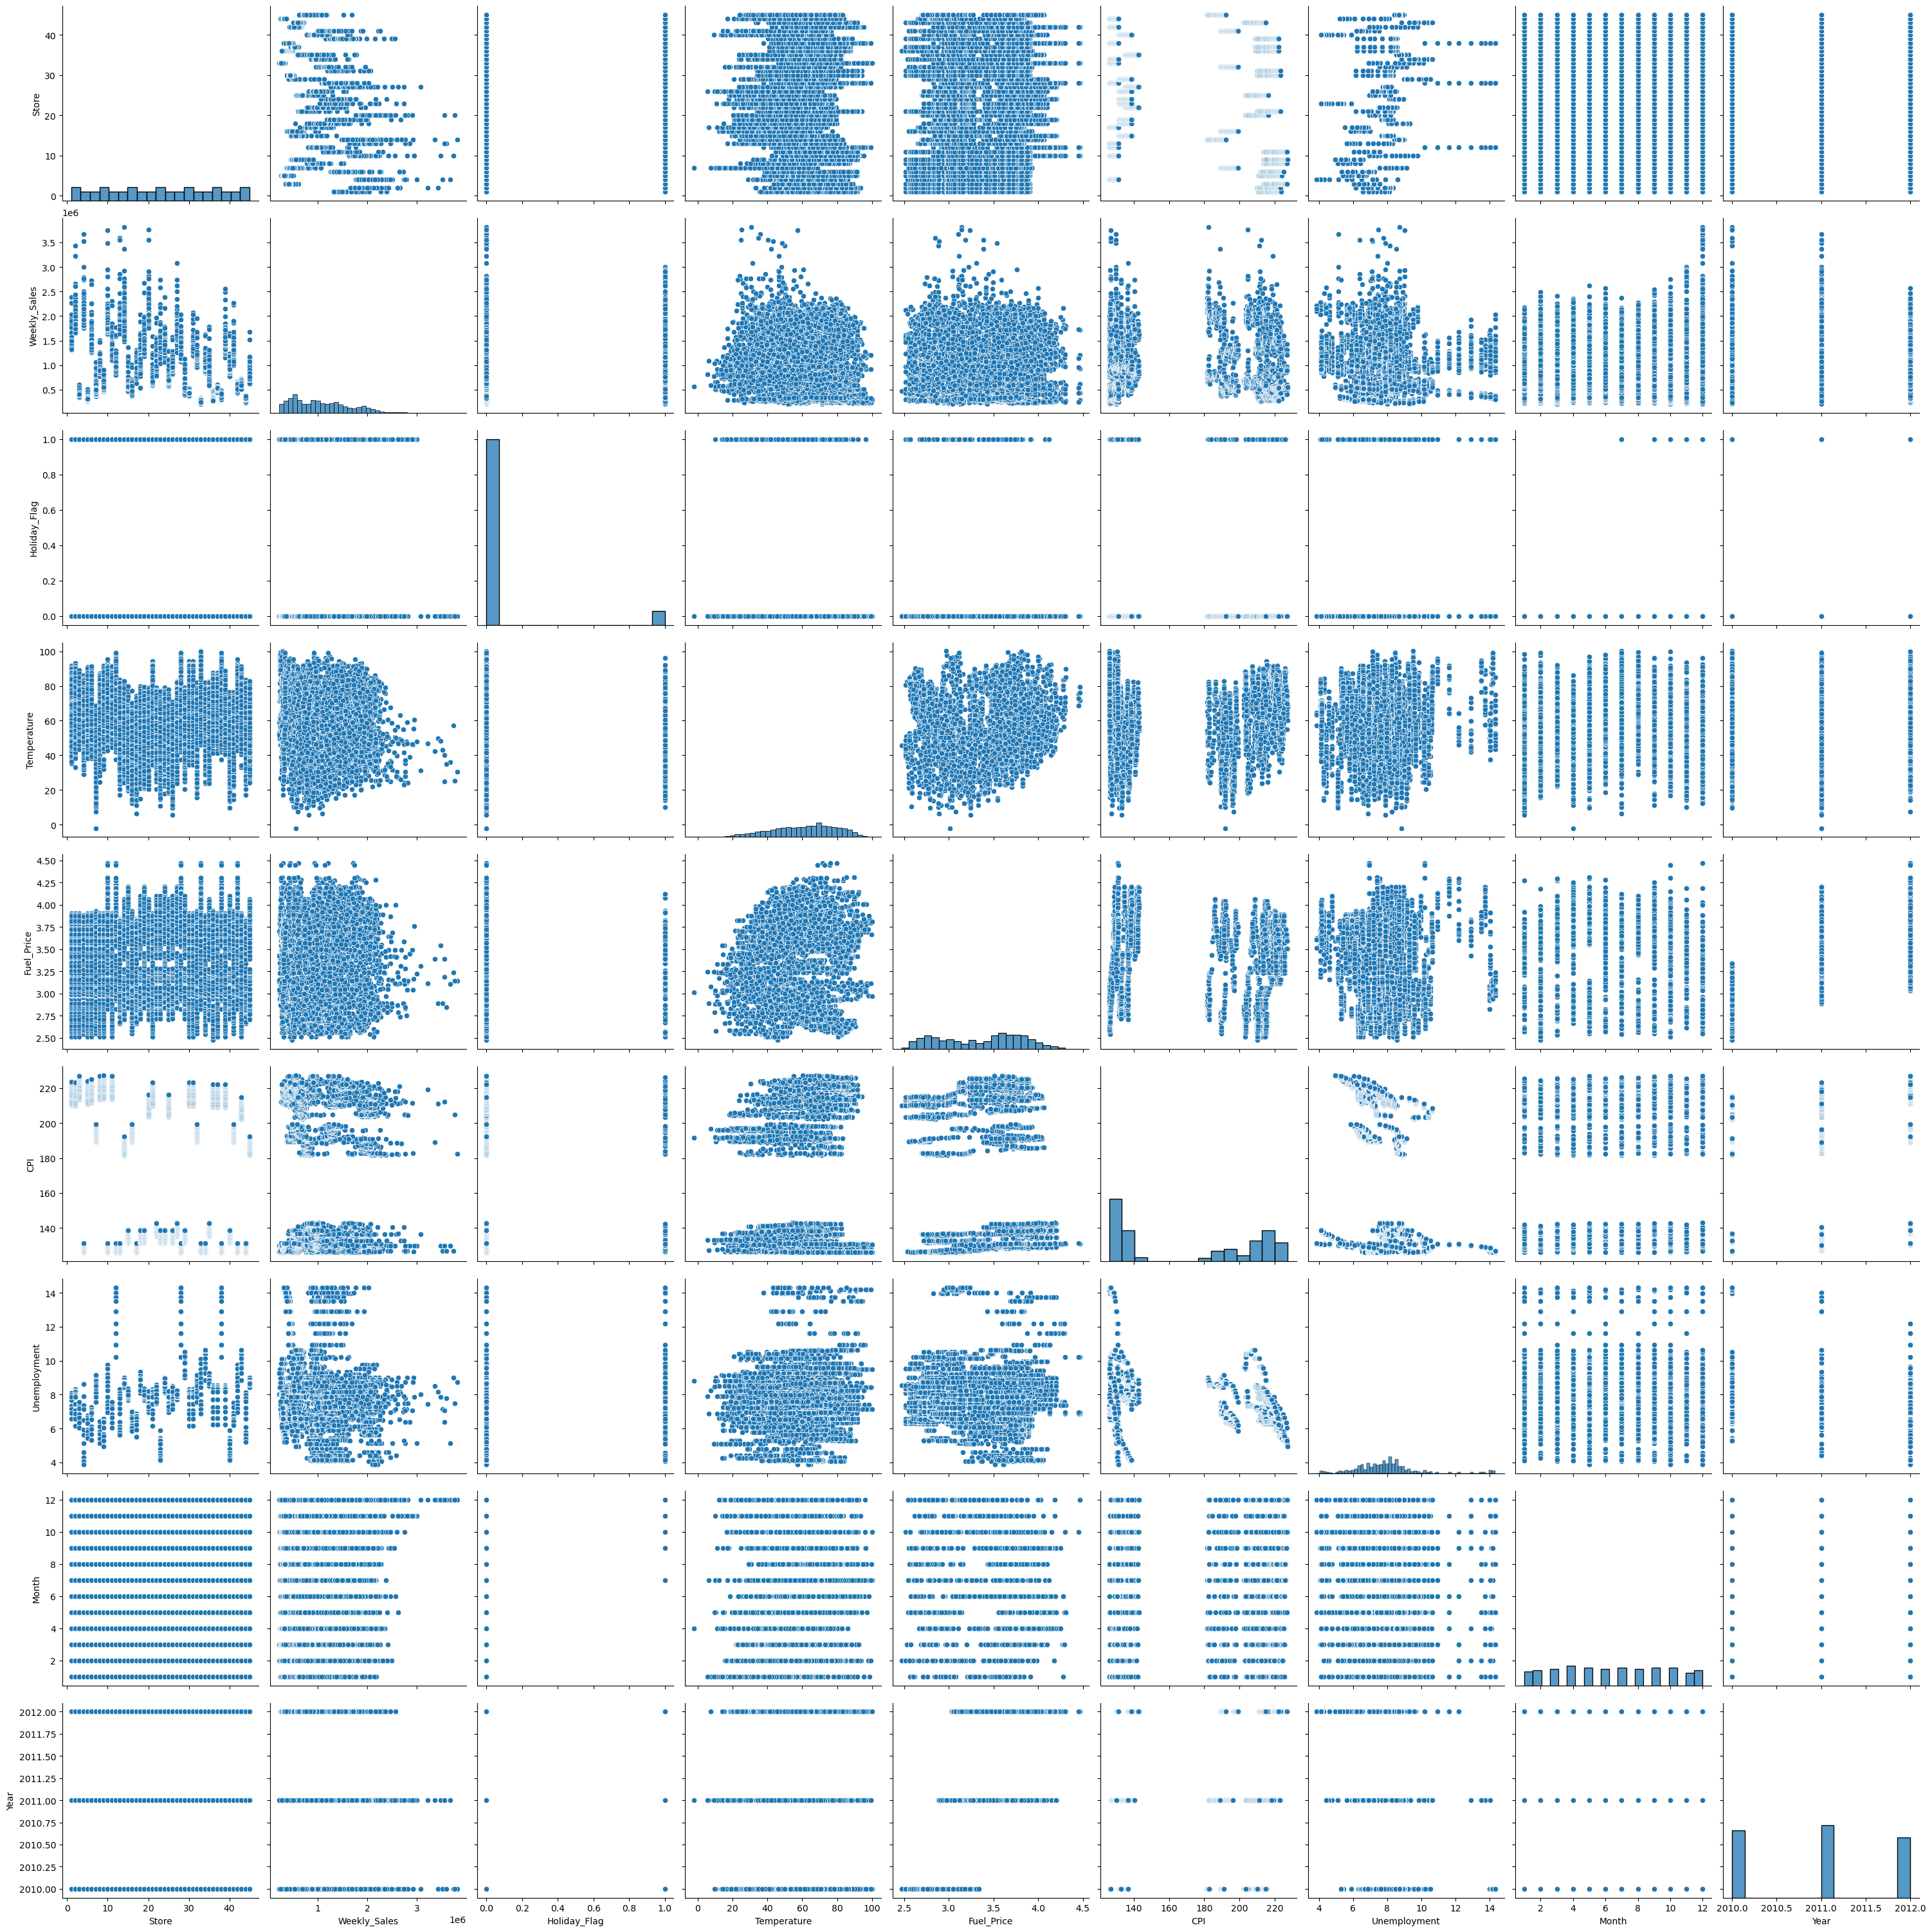

In [19]:
sns.pairplot(data, height = 3.4)
plt.show()

### Motivation and Reasons For Choosing the Algorithm

The main reason of choosing the Linear Regression algorithm is that it is giving the correct prediction results if we compare it with the other algorithms.

### Assumptions

1) One of the most important assumptions is that a linear relationship is said to exist between the dependent and the independent variables.

2) There is no correlation between the consecutive error terms of the time series data.

3) The independent variables shouldn’t be correlated. If multicollinearity exists between the independent variables, it is challenging to predict the outcome of the model.

### Model Evaluation and Techniques

In [20]:
print("MAE of Linear Regression Algorithm:")
print(mean_absolute_error(y_test, lin_preds))

MAE of Linear Regression Algorithm:
465143.86516623537


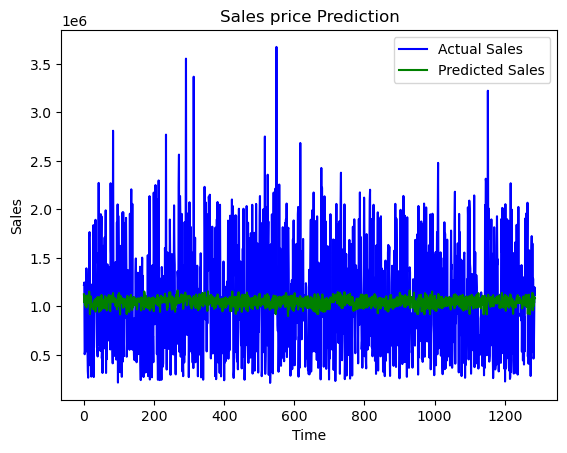

In [21]:
plt.plot(y_test, color = 'blue', label = 'Actual Sales')
plt.plot(lin_preds , color = 'green', label = 'Predicted Sales')
plt.title('Sales price Prediction')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [22]:
comparison = pd.DataFrame({'Actual':y_test, 'Predicted': lin_preds})
comparison

Actual     Predicted
0     1220984.94  1.124412e+06
1     1246322.44  1.040607e+06
2      505918.21  1.099948e+06
3      527572.25  1.010806e+06
4      719235.07  1.108698e+06
...          ...           ...
1282   460945.14  9.979540e+05
1283   484263.25  1.068861e+06
1284   833429.22  1.036037e+06
1285  1197019.39  1.093694e+06
1286  1118163.94  1.083773e+06

[1287 rows x 2 columns]

In [23]:
lin_preds

array([1124412.38943674, 1040606.73493558, 1099948.4606735 , ...,
       1036036.9833013 , 1093693.65915714, 1083772.9080191 ])

### Inferences from the Same

### Future Possibilities of the Project

For the future possibilities of the project, we can say that the sales in future can also decrease or increase because these are the predicted results and accuracy is also good but due to some reasons like quality of the products , shortage etc.. you can see some decrease in sales or in weekly sales of the products.

### 2. Save your model for each project.

In [24]:
import pickle
  
# Save the trained model as a pickle string.
saved_model = pickle.dumps(lin_model)

In [25]:
# Load the pickled model
#lin_from_pickle = pickle.loads(saved_model)


### Some other Problems

1. Using the above data, come up with useful insights that can be used by each of
the stores to improve in various areas.

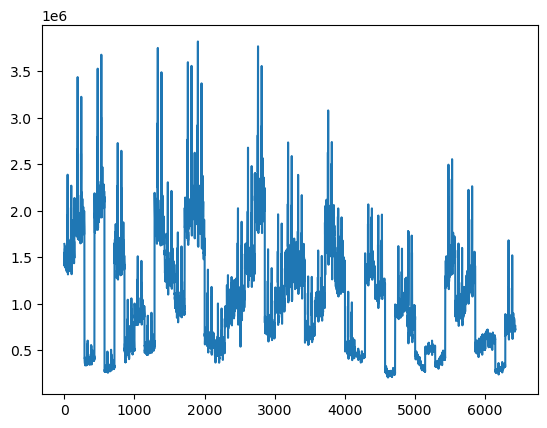

In [26]:
data['Weekly_Sales'].plot()
plt.show()

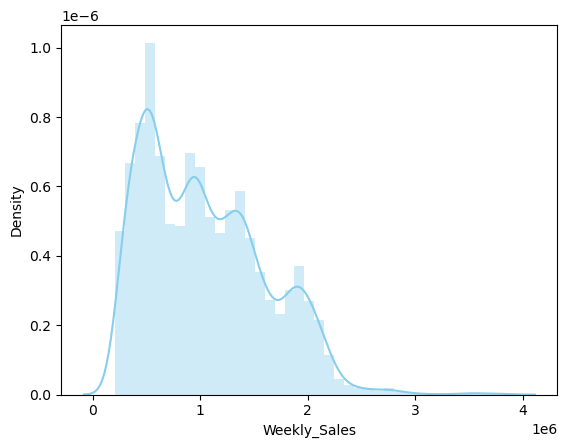

In [27]:
# Plot Histogram plot Sales column

sns.distplot(data["Weekly_Sales"] , color="skyblue")
plt.show()

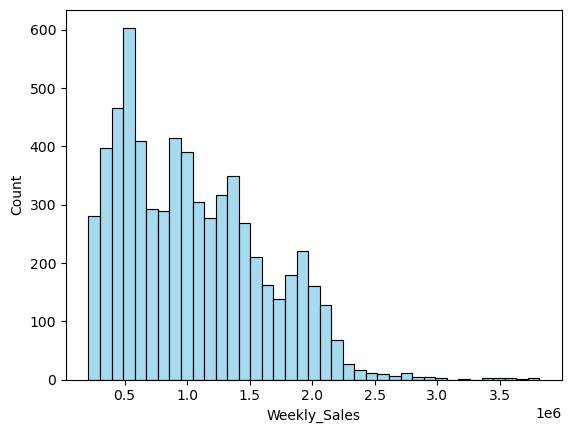

In [28]:
sns.histplot(data=data["Weekly_Sales"] , color="skyblue", label="Increasing of Sales Price (High)")
plt.show()

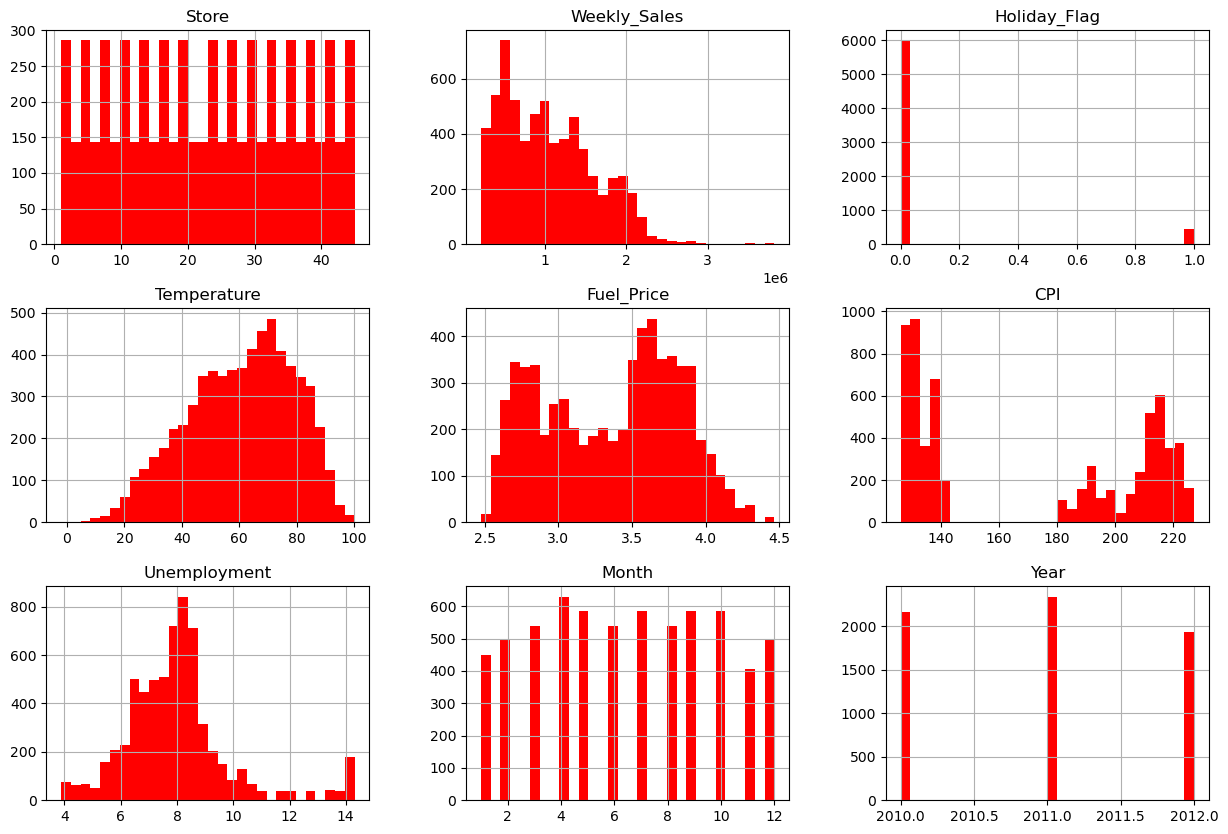

In [29]:
# Histogram

data.hist(color = "r",
        bins = 30,
        figsize = (15, 10))
plt.show()

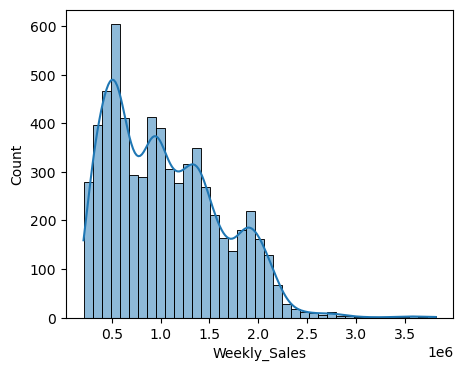

In [30]:
plt.figure(figsize = (5, 4))
sns.histplot(data = data, x = "Weekly_Sales", kde = True)
plt.show()

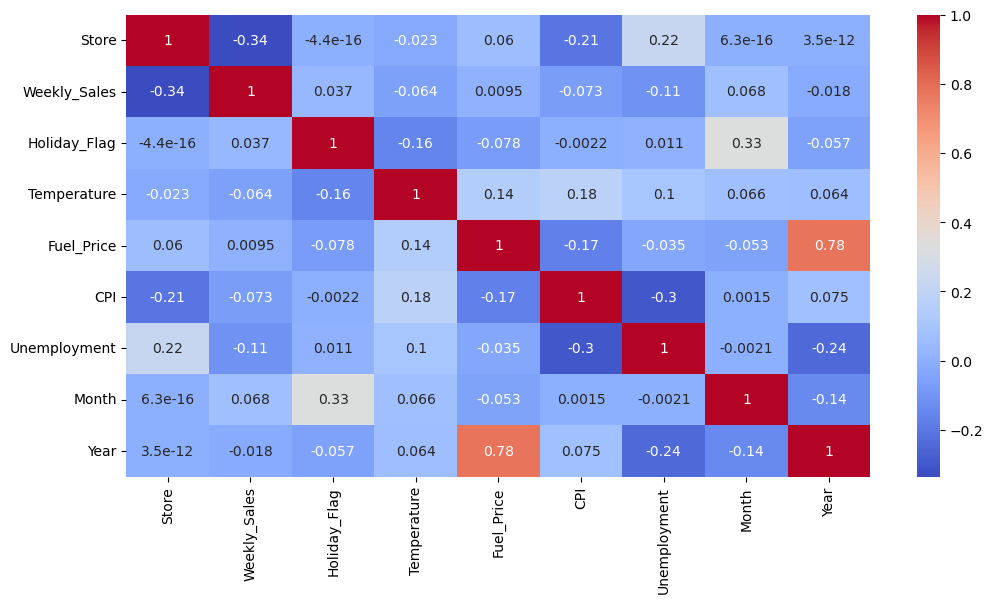

In [31]:
# Heatmap

plt.figure(figsize = (12, 6))
sns.heatmap(data.corr(), annot = True, cmap = "coolwarm")
plt.show()

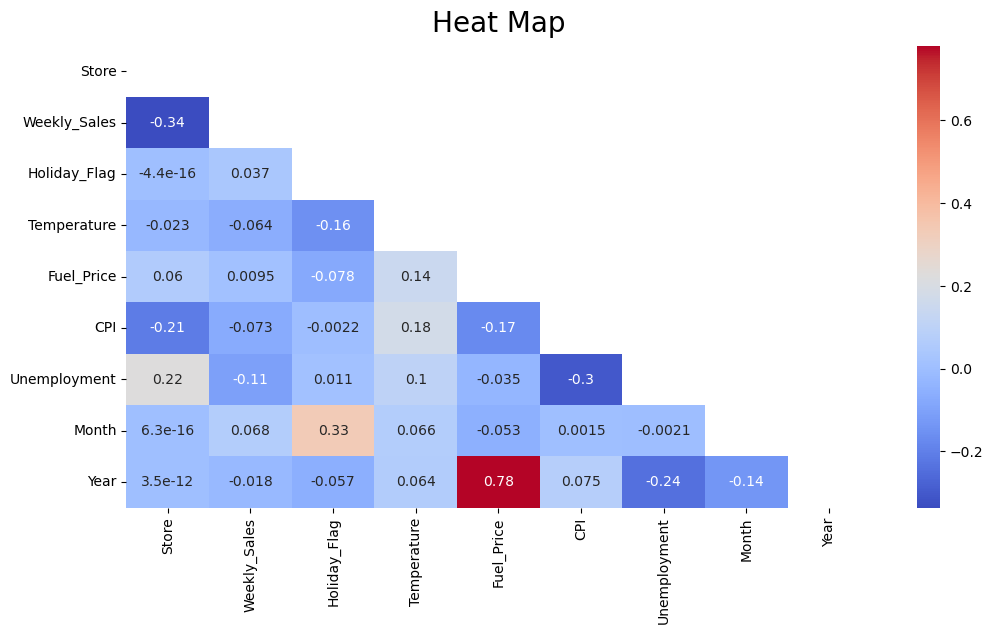

In [32]:
# You will not loose any information if you cut down one part of the heatmap along the diagonal

mask = np.triu(np.ones_like(data.corr(), dtype = np.bool))
plt.figure(figsize = (12, 6))
heatmap = sns.heatmap(data.corr(), cmap = "coolwarm", annot = True, mask = mask)
heatmap.set_title("Heat Map", fontsize = 20, pad = 10)
plt.show()

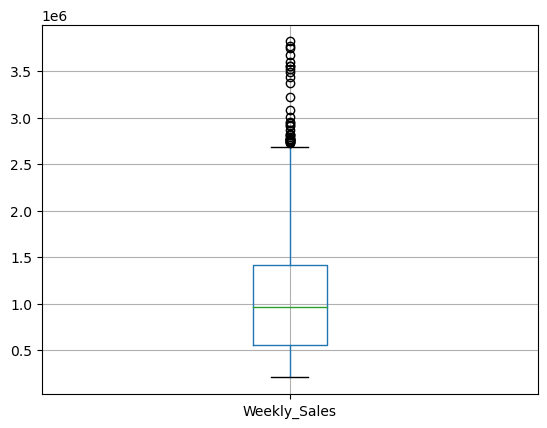

In [33]:
data.boxplot(column = "Weekly_Sales")
plt.show()
# Boxplots

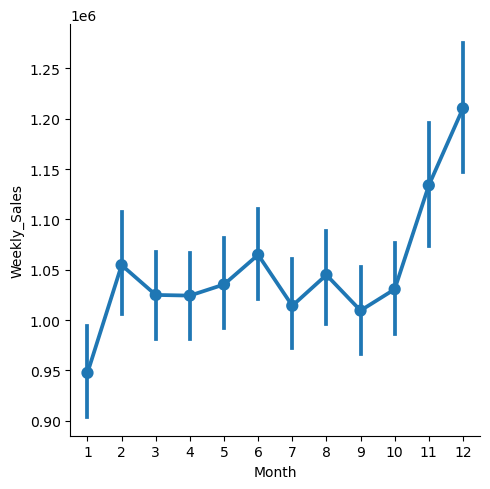

In [34]:
sns.factorplot(data = data, x ="Month", y = "Weekly_Sales") # per store type in cols
plt.show()

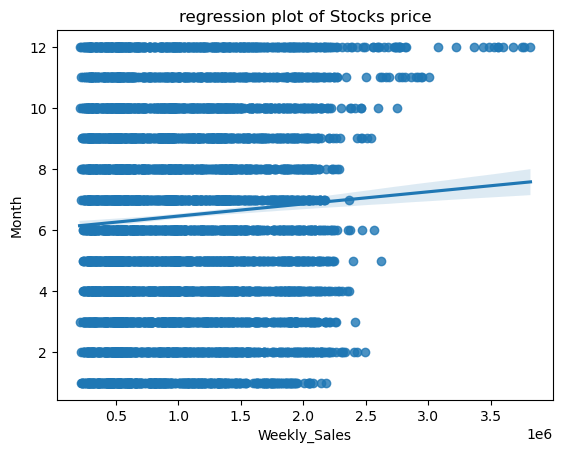

In [35]:
sns.regplot(data = data, x = 'Weekly_Sales',y = 'Month', logistic = False)
plt.title("regression plot of Stocks price")
plt.show()


2. Forecast the sales for each store for the next 12 weeks.

In [36]:
# Importing required libraries
import numpy as np
import pandas as pd, datetime
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from time import time
import os
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import  ARIMA
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
from pandas import DataFrame
import xgboost as xgb
#from fbprophet import Prophet
import warnings
warnings.filterwarnings('ignore')

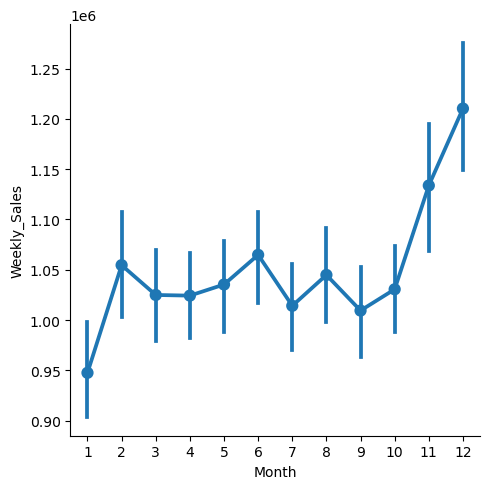

In [37]:
# Sales trend over the months and year

sns.factorplot(data = data, x ="Month", y = "Weekly_Sales")

In [38]:
data['Date'] = pd.to_datetime(data['Date'])

In [39]:
data.set_index('Date', inplace = True)

In [40]:
data

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-05-02      1    1643690.90             0        42.31       2.572   
2010-12-02      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-05-03      1    1554806.68             0        46.50       2.625   
...           ...           ...           ...          ...         ...   
2012-09-28     45     713173.95             0        64.88       3.997   
2012-05-10     45     733455.07             0        64.89       3.985   
2012-12-10     45     734464.36             0        54.47       4.000   
2012-10-19     45     718125.53             0        56.47       3.969   
2012-10-26     45     760281.43             0        58.85       3.882   

                   CPI  Unemployment  Month  Year  
Date                                               
2010-05-02  211.096358         8.106      5  2010  
2010-12-02  211.242170         8.106     12  2010  
2010-02-19  211.289143         8.106      2  2010  
2010-02-26  211.319643         8.106      2  2010  
2010-05-03  211.350143         8.106      5  2010  
...                ...           ...    ...   ...  
2012-09-28  192.013558         8.684      9  2012  
2012-05-10  192.170412         8.667      5  2012  
2012-12-10  192.327265         8.667     12  2012  
2012-10-19  192.330854         8.667     10  2012  
2012-10-26  192.308899         8.667     10  2012  

[6435 rows x 9 columns]

In [41]:
# ntratey = data.resample('A').ffill()

Text(0.5, 1.0, 'Stationarity')

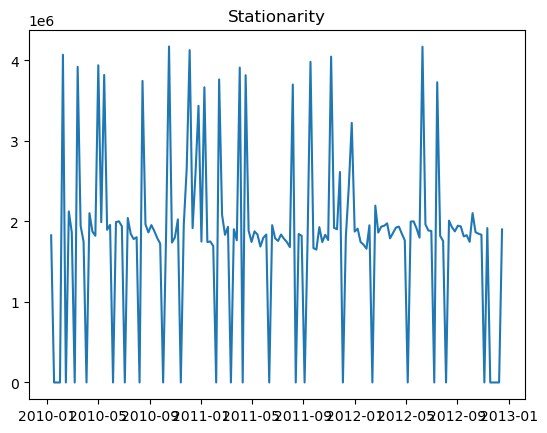

In [42]:
# Data Preparation: input should be float type
data['Weekly_Sales'] = data['Weekly_Sales'] * 1.0
# Assigning one store from each category
sales_a = data[data.Store == 2]['Weekly_Sales']
# Trend
sample = sales_a.resample('W').sum()
plt.plot(sample)
plt.title("Stationarity")

In [43]:
data.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Month           0
Year            0
dtype: int64

In [44]:
data.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-05-02      1    1643690.90             0        42.31       2.572   
2010-12-02      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-05-03      1    1554806.68             0        46.50       2.625   

                   CPI  Unemployment  Month  Year  
Date                                               
2010-05-02  211.096358         8.106      5  2010  
2010-12-02  211.242170         8.106     12  2010  
2010-02-19  211.289143         8.106      2  2010  
2010-02-26  211.319643         8.106      2  2010  
2010-05-03  211.350143         8.106      5  2010

In [45]:
data.tail()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2012-09-28     45     713173.95             0        64.88       3.997   
2012-05-10     45     733455.07             0        64.89       3.985   
2012-12-10     45     734464.36             0        54.47       4.000   
2012-10-19     45     718125.53             0        56.47       3.969   
2012-10-26     45     760281.43             0        58.85       3.882   

                   CPI  Unemployment  Month  Year  
Date                                               
2012-09-28  192.013558         8.684      9  2012  
2012-05-10  192.170412         8.667      5  2012  
2012-12-10  192.327265         8.667     12  2012  
2012-10-19  192.330854         8.667     10  2012  
2012-10-26  192.308899         8.667     10  2012

In [46]:
data.dtypes

Store             int64
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Month             int64
Year              int64
dtype: object

In [47]:
y = data['Weekly_Sales']

In [48]:
# from pylab import rcParams
# import statsmodels.api as sm
# rcParams['figure.figsize'] = 12, 8
# decomposition = sm.tsa.seasonal_decompose(data.columns, model='additive', extrapolate_trend='freq')
# fig = decomposition.plot()
# plt.show()

In [49]:
# Checking and updating the ndim

data.ndim

2

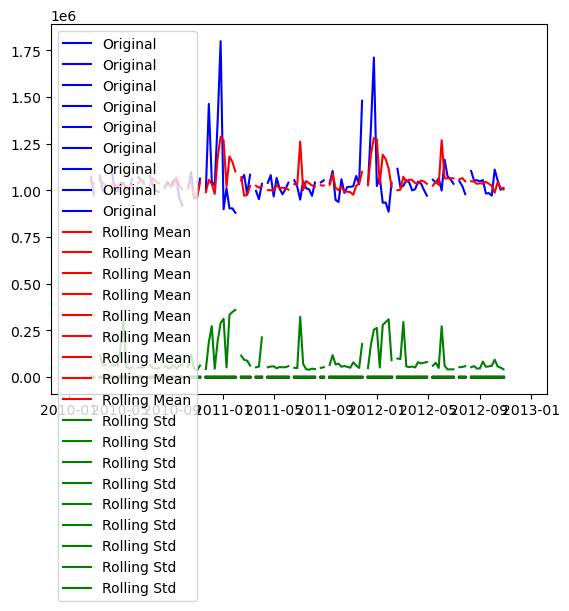

In [50]:
# Function to test the stationarity
def test_stationarity(timeseries):
    
    # Determing rolling statistics
    roll_mean = timeseries.rolling(window=7).mean()
    roll_std = timeseries.rolling(window=7).std()
# Plotting rolling statistics:
    orig = plt.plot(timeseries.resample('W').mean(), color='blue',label='Original')
    mean = plt.plot(roll_mean.resample('W').mean(), color='red', label='Rolling Mean')
    std = plt.plot(roll_std.resample('W').mean(), color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.show(block=False)
    
  # Performing Dickey-Fuller test:
    #print('Results of Dickey-Fuller Test:')
    #result = adfuller(timeseries, autolag='AIC')
    #print('ADF Statistic: %f' % result[0])
    #print('p-value: %f' % result[1])
    #print('Critical Values:')
    #for key, value in result[4].items():
     #      print(key, value)
# Testing stationarity of store type a
test_stationarity(data)

In [51]:
data.dtypes

Store             int64
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Month             int64
Year              int64
dtype: object

In [52]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [53]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:198269.57354489036
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:193925.1444514116
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:180828.349143695
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:179942.29745178996
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:180736.86286569064
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:180233.90672537853
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:179969.07743502117
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:179929.3470549704
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:193976.04726809153
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:192594.0562286291
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:178996.50187246536
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:177826.42304356414
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:191789.6796449052
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:191688.07329020443
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:177963.85691897644
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:177820.87463696612
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:174429.30849131767
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:174108.2188558547

In [54]:
model_sarima = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_sarima = model_sarima.fit()
print(results_sarima.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1378      0.030      4.569      0.000       0.079       0.197
ma.L1         -0.5596      0.026    -21.557      0.000      -0.611      -0.509
ma.S.L12      -0.9101      0.006   -147.729      0.000      -0.922      -0.898
sigma2      6.075e+10    2.4e-13   2.53e+23      0.000    6.07e+10    6.07e+10


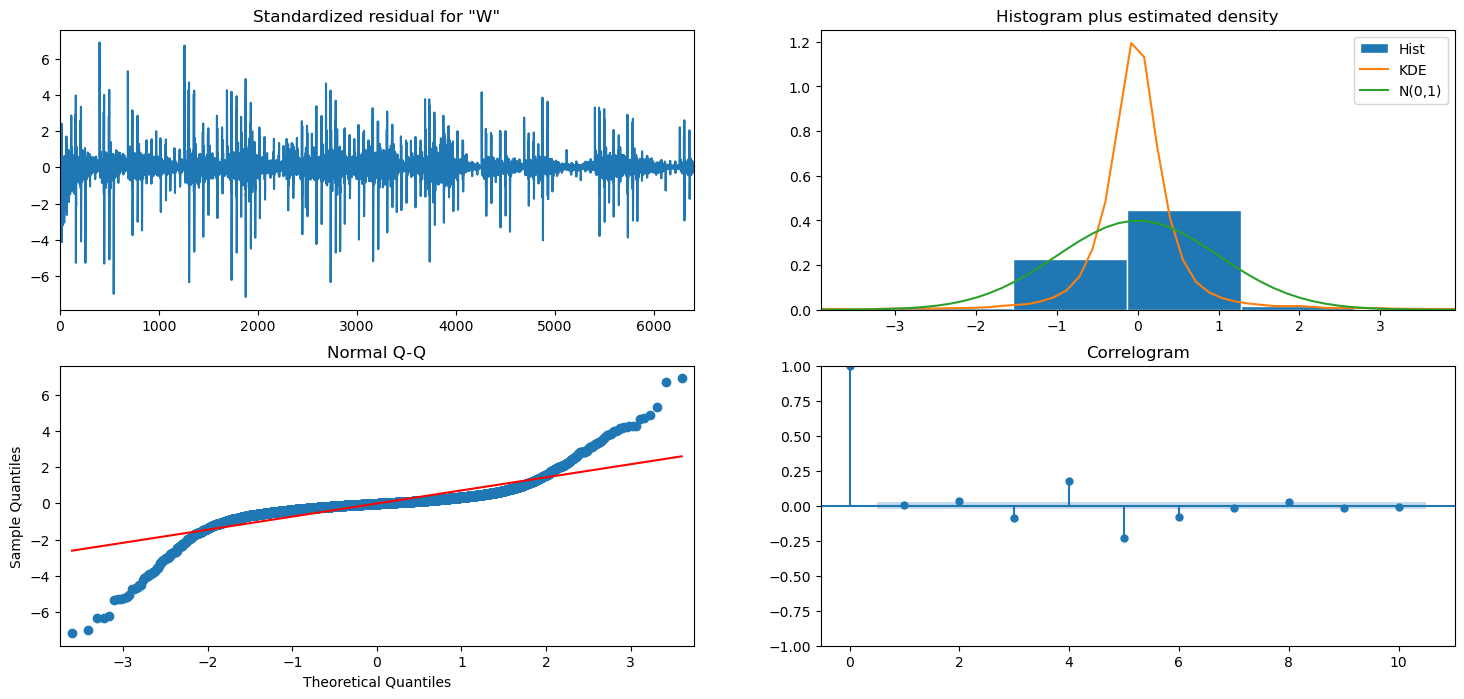

In [55]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

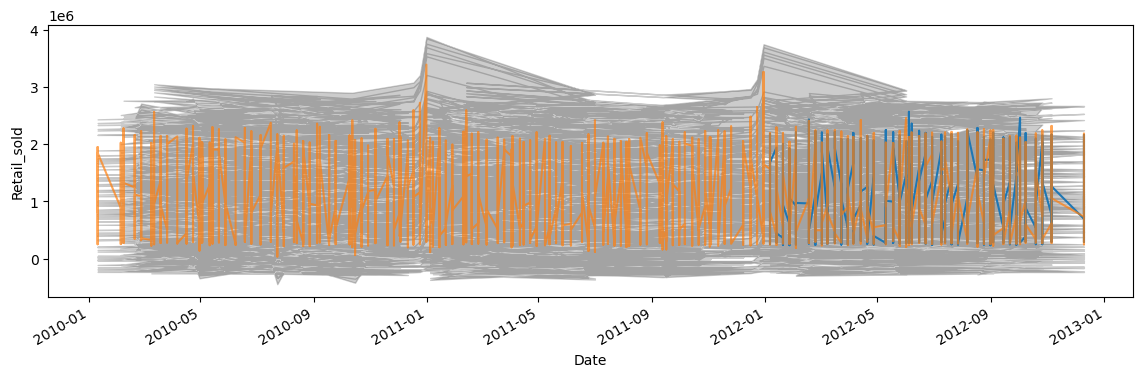

In [56]:
pred = results.get_prediction(start=pd.to_datetime('2012-10-19'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2012':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Retail_sold')
#plt.legend()
plt.show()

In [57]:
data

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-05-02      1    1643690.90             0        42.31       2.572   
2010-12-02      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-05-03      1    1554806.68             0        46.50       2.625   
...           ...           ...           ...          ...         ...   
2012-09-28     45     713173.95             0        64.88       3.997   
2012-05-10     45     733455.07             0        64.89       3.985   
2012-12-10     45     734464.36             0        54.47       4.000   
2012-10-19     45     718125.53             0        56.47       3.969   
2012-10-26     45     760281.43             0        58.85       3.882   

                   CPI  Unemployment  Month  Year  
Date                                               
2010-05-02  211.096358         8.106      5  2010  
2010-12-02  211.242170         8.106     12  2010  
2010-02-19  211.289143         8.106      2  2010  
2010-02-26  211.319643         8.106      2  2010  
2010-05-03  211.350143         8.106      5  2010  
...                ...           ...    ...   ...  
2012-09-28  192.013558         8.684      9  2012  
2012-05-10  192.170412         8.667      5  2012  
2012-12-10  192.327265         8.667     12  2012  
2012-10-19  192.330854         8.667     10  2012  
2012-10-26  192.308899         8.667     10  2012  

[6435 rows x 9 columns]

In [58]:
y_forecasted = pred.predicted_mean
y_truth = y['2012-10-19':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 576105229658.99
The Root Mean Squared Error is 759015.96


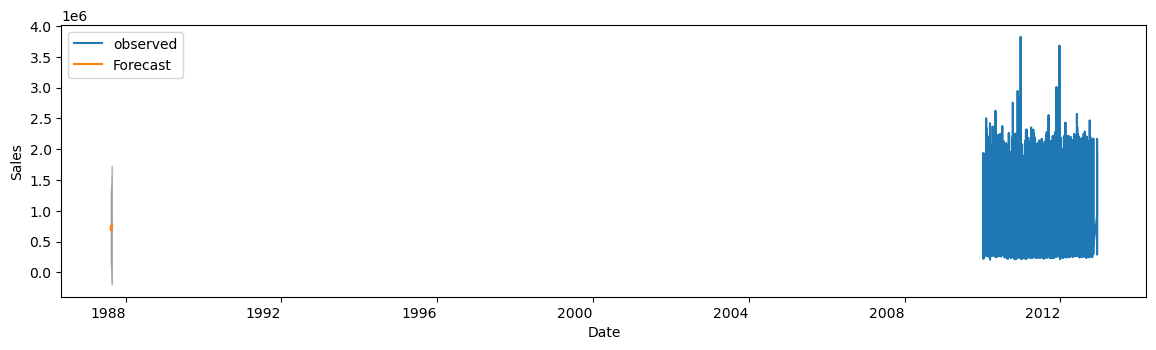

In [59]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

### Here I Forecasted the results for the next 12 weeks.

#### Project 1 Completed....

## Problem Statement 2:

An online retail store is trying to understand the various customer purchase patterns for their
firm, you are required to give enough evidence based insights to provide the same.

### Project Objective

1. Using the above data, find useful insights about the customer purchasing history
that can be an added advantage for the online retaile

### Data Pre-processing Steps and Inspiration

Libraries are imported in previous project

In [60]:
data2 = pd.read_excel("Online Retail.xlsx")
data2

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[541909 rows x 8 columns]

In [61]:
data2.shape

(541909, 8)

In [62]:
data2.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [63]:
data2.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [64]:
# Fetching those row(s) where there is/are missing values
data2[data2['Description'].isna() | data2['CustomerID'].isna()]

InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

               InvoiceDate  UnitPrice  CustomerID         Country  
622    2010-12-01 11:52:00       0.00         NaN  United Kingdom  
1443   2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1444   2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1445   2010-12-01 14:32:00       0.85         NaN  United Kingdom  
1446   2010-12-01 14:32:00       1.66         NaN  United Kingdom  
...                    ...        ...         ...             ...  
541536 2011-12-09 10:26:00       4.13         NaN  United Kingdom  
541537 2011-12-09 10:26:00       4.13         NaN  United Kingdom  
541538 2011-12-09 10:26:00       4.96         NaN  United Kingdom  
541539 2011-12-09 10:26:00      10.79         NaN  United Kingdom  
541540 2011-12-09 10:26:00    1714.17         NaN  United Kingdom  

[135080 rows x 8 columns]

In [65]:
## Now lets treat the null values first 

In [66]:
data2['Description'].fillna(value=data2['Description'].value_counts().index[0],inplace =True)

In [67]:
data2['CustomerID'].fillna(value=data2['CustomerID'].value_counts().index[0],inplace =True)

In [68]:
data2.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [69]:
data2.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Data Visualization 

In [70]:
# data2.plot()
# plt.title("Complete dataset")
# plt.show()

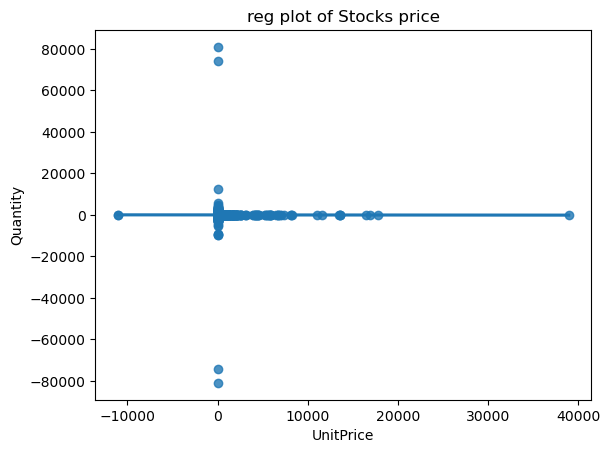

In [71]:
sns.regplot(data = data2, x = 'UnitPrice', y = 'Quantity', logistic = False)
plt.title("reg plot of Stocks price")
plt.show()

<AxesSubplot:xlabel='Quantity', ylabel='Density'>

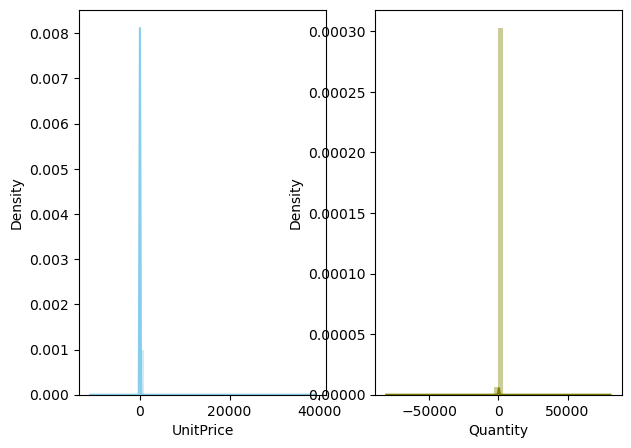

In [72]:
# Create subplots 
f, axes = plt.subplots(1, 2, figsize=(7, 5))

# Plot Histogram plot with Price column
sns.distplot(data2["UnitPrice"] , color="skyblue", ax=axes[0])

# Plot Histogram plot with Quantity column
sns.distplot(data2["Quantity"] , color="olive", ax=axes[1])

In [73]:
# Plotting a histogram to view how the 'Quantity' and 'UnitPrice' feature are laid out.

#sns.histplot(data=data2["UnitPrice"] , color="skyblue", label="Increasing Price (High)")
#sns.histplot(data=data2["Quantity"] , color="green", label="Quantity")
#plt.title("Comparision between Quantity and Prices")
#plt.show()

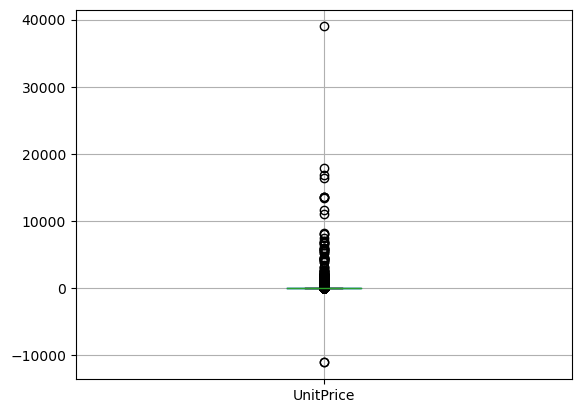

In [74]:
data2.boxplot(column = "UnitPrice")
plt.show()
# Boxplots

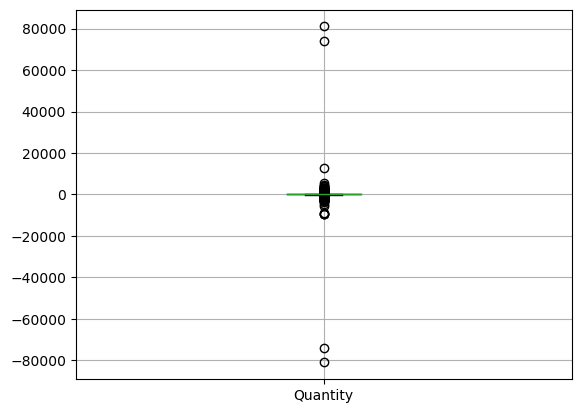

In [75]:
data2.boxplot(column = "Quantity")
plt.show()
# Boxplots

In [76]:
# Viewing all the Integer columns
ints = data2.select_dtypes(exclude = 'object').columns.to_list()
ints

['Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID']

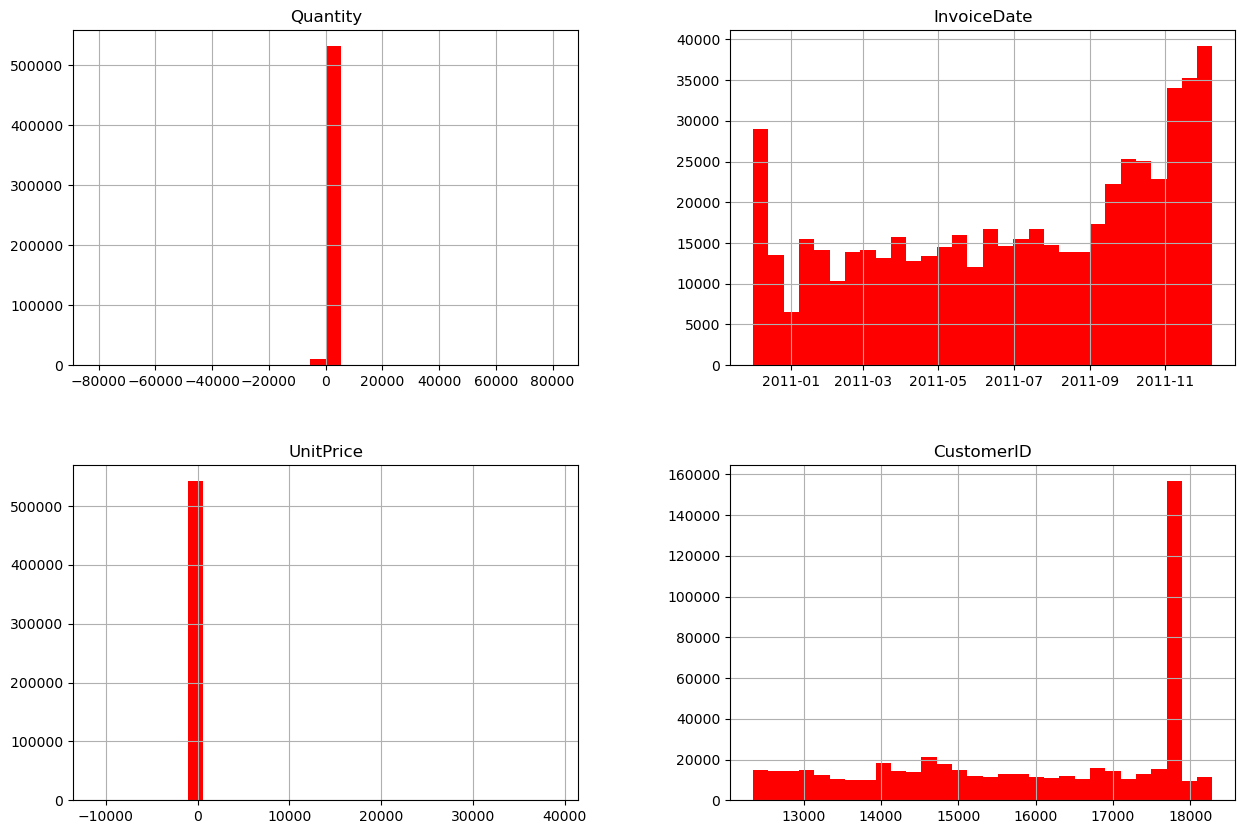

In [77]:
# Histogram

data2.hist(color = "r",
        bins = 30,
        figsize = (15, 10))
plt.show()

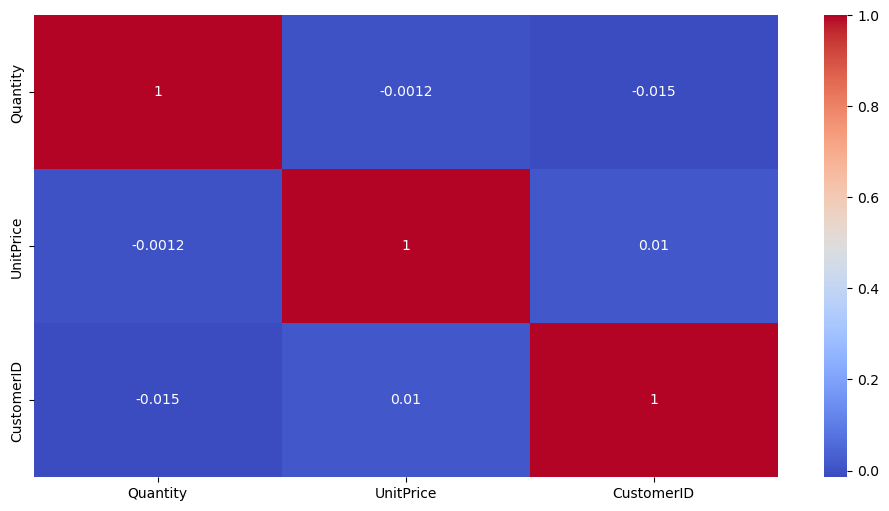

In [78]:
# Heatmap

plt.figure(figsize = (12, 6))
sns.heatmap(data2.corr(), annot = True, cmap = "coolwarm")
plt.show()

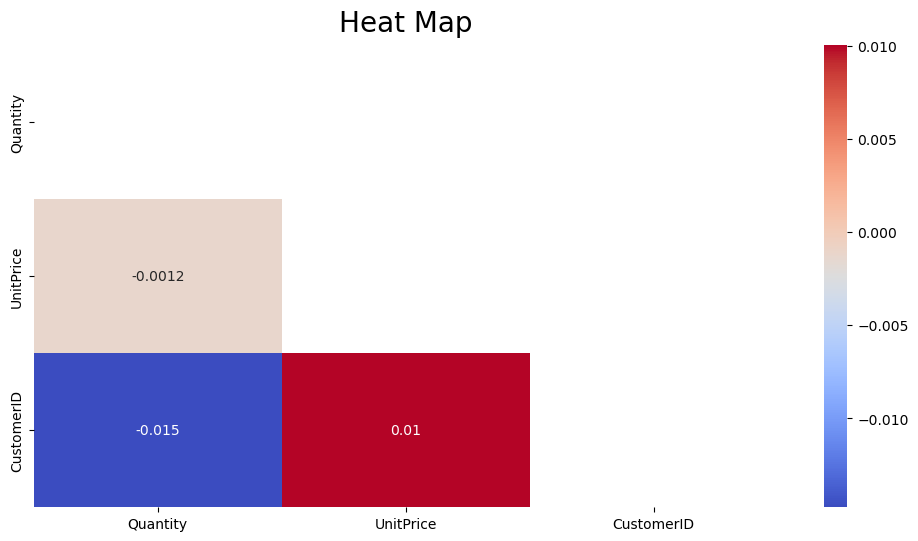

In [79]:
# You will not loose any information if you cut down one part of the heatmap along the diagonal

mask = np.triu(np.ones_like(data2.corr(), dtype = np.bool))
plt.figure(figsize = (12, 6))
heatmap = sns.heatmap(data2.corr(), cmap = "coolwarm", annot = True, mask = mask)
heatmap.set_title("Heat Map", fontsize = 20, pad = 10)
plt.show()

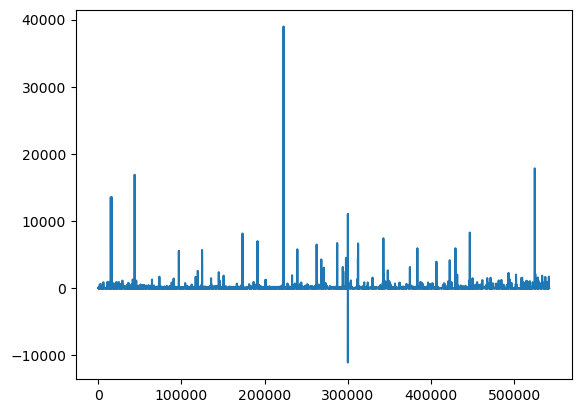

In [80]:
data2['UnitPrice'].plot()
plt.show()

### Segment the customers based on their purchasing behavior

### Recency Frequency Monetary (RFM) table

#### when the customer buy the product for last time, how frequent the customer buy the product, and how much  the customer pays

####  for the product. We will call this segmentation as RFM segmentation.


In [81]:
data2.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [82]:
# Convert to show date only
from datetime import datetime

data2["InvoiceDate"] = data2["InvoiceDate"].dt.date
# Create TotalSum colummn
data2["TotalSum"] = data2["Quantity"] * data2["UnitPrice"]
# Create date variable that records recency
import datetime
snapshot_date = max(data2.InvoiceDate) + datetime.timedelta(days=1)
# Aggregate data by each customer
customers = data2.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})
# Rename columns
customers.rename(columns = {'InvoiceDate': 'Recency',
                            'InvoiceNo': 'Frequency',
                            'TotalSum': 'MonetaryValue'}, inplace=True)

In [83]:
data2.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

  InvoiceDate  UnitPrice  CustomerID         Country  TotalSum  
0  2010-12-01       2.55     17850.0  United Kingdom     15.30  
1  2010-12-01       3.39     17850.0  United Kingdom     20.34  
2  2010-12-01       2.75     17850.0  United Kingdom     22.00  
3  2010-12-01       3.39     17850.0  United Kingdom     20.34  
4  2010-12-01       3.39     17850.0  United Kingdom     20.34

In [84]:
# Manage Skewness and Scaling

In [85]:
from scipy import stats
customers_fix = pd.DataFrame()
customers_fix["Recency"] = stats.boxcox(customers['Recency'])[0]
customers_fix["Frequency"] = stats.boxcox(customers['Frequency'])[0]
customers_fix["MonetaryValue"] = pd.Series(np.cbrt(customers['MonetaryValue'])).values
customers_fix.tail()

Recency  Frequency  MonetaryValue
4367  8.939976   2.421134       5.652483
4368  7.954748   2.030136       4.323541
4369  2.449653   2.712621       5.610440
4370  1.544846   7.675657      12.795376
4371  5.089992   4.663842      12.247810

### If we look at the plot once more, each variable don’t have the same mean and variance. We have to normalize it. 

In [87]:
# Import library
from sklearn.preprocessing import StandardScaler
# Initialize the Object
scaler = StandardScaler()
# Fit and Transform The Data
scaler.fit(customers_fix)
customers_normalized = scaler.transform(customers_fix)
# Assert that it has mean 0 and variance 1
print(customers_normalized.mean(axis = 0).round(2)) # [0. -0. 0.]
print(customers_normalized.std(axis = 0).round(2)) # [1. 1. 1.]

[ 0. -0. -0.]
[1. 1. 1.]


In [88]:
# Finally, we can do clustering using that data.

In [89]:
customers_fix.tail()

Recency  Frequency  MonetaryValue
4367  8.939976   2.421134       5.652483
4368  7.954748   2.030136       4.323541
4369  2.449653   2.712621       5.610440
4370  1.544846   7.675657      12.795376
4371  5.089992   4.663842      12.247810

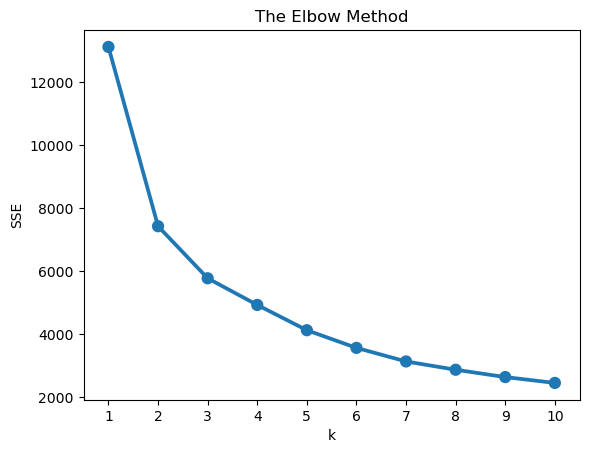

In [90]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [91]:
# Fitting the model
model = KMeans(n_clusters=3, random_state=42)
model.fit(customers_normalized)
model.labels_.shape


(4372,)

### Save your model for each project.

In [92]:
import pickle
  
# Save the trained model as a pickle string.
saved_model = pickle.dumps(model)

In [93]:
# Interpret The Segment

In [94]:
customers["Cluster"] = model.labels_
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0        186.67     19.28        354.08  1645
1         43.10     66.48       1001.31  1934
2         18.08    481.24       9115.69   793

In [95]:
# we can analyze the segments using snake plot. It requires the normalized dataset and also the cluster labels.

<AxesSubplot:xlabel='Attribute', ylabel='Value'>

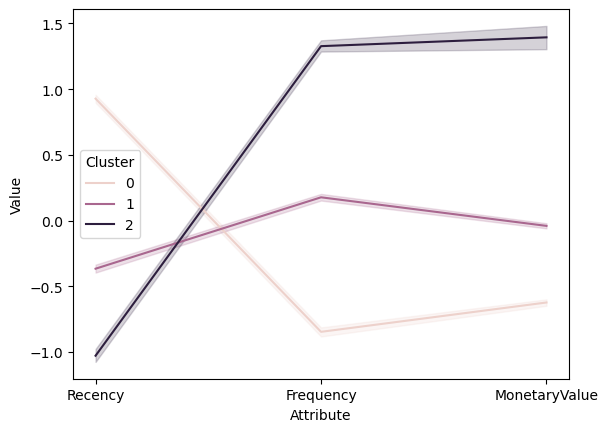

In [96]:
# Create the dataframe
df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = customers.index
df_normalized['Cluster'] = model.labels_
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()
# Visualize it
sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)

### RESULT:

I infer that cluster 0 is frequent, spend more, and they buy the product recently. Therefore, it could be the cluster of a loyal customer.

Then, the cluster 1 is less frequent, less to spend, but they buy the product recently. Therefore, it could be the cluster of new customer.

Finally, the cluster 2 is less frequent, less to spend, and they buy the product at the old time. Therefore, it could be the cluster of churned customers.

## Project 2 Completed

### Problem Statement 3:
    
You are working in an e-commerce company, and your company has put forward a task to
analyze the customer reviews for various products. You are supposed to create a report that
classifies the products based on the customer reviews.

In [97]:
data3 = pd.read_csv("Reviews.csv")
data3

Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                          1                       1      5  1303862400   
1                          0                       0      1  1346976000   
2                          1                       1      4  1219017600   
3                          3                       3      2  1307923200   
4                          0                       0      5  1350777600   
...                      ...                     ...    ...         ...   
568449                     0                       0      5  1299628800   
568450                     0                       0      2  1331251200   
568451                     2                       2      5  1329782400   
568452                     1                       1      5  1331596800   
568453                     0                       0      5  1338422400   

                                   Summary  \
0                    Good Quality Dog Food   
1                        Not as Advertised   
2                    "Delight" says it all   
3                           Cough Medicine   
4                              Great taffy   
...                                    ...   
568449                 Will not do without   
568450                        disappointed   
568451            Perfect for our maltipoo   
568452  Favorite Training and reward treat   
568453                         Great Honey   

                                                     Text  
0       I have bought several of the Vitality canned d...  
1       Product arrived labeled as Jumbo Salted Peanut...  
2       This is a confection that has been around a fe...  
3       If you are looking for the secret ingredient i...  
4       Great taffy at a great price.  There was a wid...  
...                                                   ...  
568449  Great for sesame chicken..this is a good if no...  
568450  I'm disappointed with the flavor. The chocolat...  
568451  These stars are small, so you can give 10-15 o...  
568452  These are the BEST treats for training and rew...  
568453  I am very satisfied ,product is as advertised,...  

[568454 rows x 10 columns]

In [98]:
data3.shape

(568454, 10)

###  Problem
Find various trends and patterns in the reviews data, create useful insights that best describe the product quality and Sentiment Analysis..

In [99]:
data3.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [100]:
import re
 
# Natural Language Tool Kit
import nltk
 
#nltk.download('stopwords')
from nltk.corpus import stopwords

In [101]:
# to remove stopword
from nltk.corpus import stopwords
 
# for Stemming propose
from nltk.stem.porter import PorterStemmer

In [102]:
# Initialize empty array
# to append clean text
corpus = []
 
# 1000 (reviews) rows to clean
for i in range(0, 1000):
     
    # column : "Review", row ith
    reviews = re.sub('[^a-zA-Z]', ' ', data3['Summary'][i])
     
    # convert all cases to lower cases
    reviews = reviews.lower()
     
    # split to array(default delimiter is " ")
    reviews = reviews.split()
     
    # creating PorterStemmer object to
    # take main stem of each word
    ps = PorterStemmer()
     
    # loop for stemming each word
    # in string array at ith row   
    reviews = [ps.stem(word) for word in reviews
                if not word in set(stopwords.words('english'))]
                 
    # rejoin all string array elements
    # to create back into a string
    reviews = ' '.join(reviews) 
     
    # append each string to create
    # array of clean text
    corpus.append(reviews)

In [103]:
corpus

['good qualiti dog food',
 'advertis',
 'delight say',
 'cough medicin',
 'great taffi',
 'nice taffi',
 'great good expens brand',
 'wonder tasti taffi',
 'yay barley',
 'healthi dog food',
 'best hot sauc world',
 'cat love diet food better regular food',
 'cat fan new food',
 'fresh greasi',
 'strawberri twizzler yummi',
 'lot twizzler expect',
 'poor tast',
 'love',
 'great sweet candi',
 'home deliv twizler',
 'alway fresh',
 'twizzler',
 'delici product',
 'twizzler',
 'pleas sell mexico',
 'twizzler strawberri',
 'nasti flavor',
 'great bargain price',
 'yummi',
 'best hot sauc world',
 'great machin',
 'tast',
 'best instant oatmeal',
 'good instant',
 'great irish oatmeal hurri',
 'satisfi',
 'love gluten free oatmeal',
 'oatmeal',
 'good way start day',
 'wife favorit breakfast',
 'buy oatmeal mcann tast great',
 'oatmeal oatmeal lover',
 'food great',
 'good hot breakfast',
 'great tast conveni',
 'hearti oatmeal',
 'good',
 'mushi',
 'good next time order varieti pack',
 's

In [104]:
# Taking a look at the dataset 
data3.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [105]:
data3['Text']

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 568454, dtype: object

### Classifying each review based on the sentiment associated with the same

In [107]:
# Set random seed
seed = 123
# Data manipulation/analysis
import numpy as np
import pandas as pd
# Text preprocessing/analysis
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
# Modelling
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", context='talk')

In [108]:
data3['Summary'] = data3['Summary'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '  ')
data3['Summary'] = data3['Summary'].str.replace(r"[\"\'\|\?\=\.\@\#\*\,]", '  ')

In [109]:
data3.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                   Summary                                               Text  
0    Good Quality Dog Food  I have bought several of the Vitality canned d...  
1        Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2    Delight   says it all  This is a confection that has been around a fe...  
3           Cough Medicine  If you are looking for the secret ingredient i...  
4              Great taffy  Great taffy at a great price.  There was a wid...

In [110]:
data3['Summary'] = data3 ['Summary'].astype (str)

In [111]:
from textblob import TextBlob
data3['polarity'] = data3['Summary'].apply(lambda x: TextBlob(x).polarity)
data3['subjective'] = data3['Summary'].apply(lambda x: TextBlob(x).subjectivity)

In [112]:
data3.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                   Summary                                               Text  \
0    Good Quality Dog Food  I have bought several of the Vitality canned d...   
1        Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2    Delight   says it all  This is a confection that has been around a fe...   
3           Cough Medicine  If you are looking for the secret ingredient i...   
4              Great taffy  Great taffy at a great price.  There was a wid...   

   polarity  subjective  
0       0.7        0.60  
1       0.0        0.00  
2       0.0        0.00  
3       0.0        0.00  
4       0.8        0.75

### We then can calculate the sentiment through the polarity function. polarity ranges from -1 to 1, with -1 being negative and 1 being positive. 

In [113]:
data3['polarity'] = np.round(data3['polarity'], decimals = 0) 

In [114]:
data3.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                   Summary                                               Text  \
0    Good Quality Dog Food  I have bought several of the Vitality canned d...   
1        Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2    Delight   says it all  This is a confection that has been around a fe...   
3           Cough Medicine  If you are looking for the secret ingredient i...   
4              Great taffy  Great taffy at a great price.  There was a wid...   

   polarity  subjective  
0       1.0        0.60  
1       0.0        0.00  
2       0.0        0.00  
3       0.0        0.00  
4       1.0        0.75

In [115]:
data3['subjective'] = np.round(data3['subjective'], decimals = 0) 

In [116]:
data3.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                   Summary                                               Text  \
0    Good Quality Dog Food  I have bought several of the Vitality canned d...   
1        Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2    Delight   says it all  This is a confection that has been around a fe...   
3           Cough Medicine  If you are looking for the secret ingredient i...   
4              Great taffy  Great taffy at a great price.  There was a wid...   

   polarity  subjective  
0       1.0         1.0  
1       0.0         0.0  
2       0.0         0.0  
3       0.0         0.0  
4       1.0         1.0

In [117]:
data3['Sentiments'] = np.where(data3['polarity']== 1, 'positive', 'Negative')

In [118]:
data3.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                   Summary                                               Text  \
0    Good Quality Dog Food  I have bought several of the Vitality canned d...   
1        Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2    Delight   says it all  This is a confection that has been around a fe...   
3           Cough Medicine  If you are looking for the secret ingredient i...   
4              Great taffy  Great taffy at a great price.  There was a wid...   

   polarity  subjective Sentiments  
0       1.0         1.0   positive  
1       0.0         0.0   Negative  
2       0.0         0.0   Negative  
3       0.0         0.0   Negative  
4       1.0         1.0   positive

### So , we can now tell about the reviews which is a positive review and which is negative review...

In [119]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
# Modelling
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", context='talk')

In [120]:
data4 = data3[['Summary', 'polarity', 'subjective', 'Text', 'Sentiments']]

In [121]:
data3['target'] = np.where(data4['Sentiments']=='positive', 1, 0) # 1 = Positive
# Check values


In [122]:
data4['target'] = np.where(data4['Sentiments']=='positive', 1, 0) # 1 = Positive

In [123]:
data4.groupby(['Sentiments', 'target']).count().unstack()

Summary            polarity           subjective            \
target             0         1         0         1          0         1   
Sentiments                                                                
Negative    365866.0       NaN  365866.0       NaN   365866.0       NaN   
positive         NaN  202588.0       NaN  202588.0        NaN  202588.0   

                Text            
target             0         1  
Sentiments                      
Negative    365866.0       NaN  
positive         NaN  202588.0

In [124]:
data3.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                   Summary                                               Text  \
0    Good Quality Dog Food  I have bought several of the Vitality canned d...   
1        Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2    Delight   says it all  This is a confection that has been around a fe...   
3           Cough Medicine  If you are looking for the secret ingredient i...   
4              Great taffy  Great taffy at a great price.  There was a wid...   

   polarity  subjective Sentiments  target  
0       1.0         1.0   positive       1  
1       0.0         0.0   Negative       0  
2       0.0         0.0   Negative       0  
3       0.0         0.0   Negative       0  
4       1.0         1.0   positive       1

In [125]:
data3[['polarity', 'subjective']] = data3['Summary'].apply(lambda x:TextBlob(x).sentiment).to_list()
columns = ['Summary', 'target', 'polarity', 'subjective']
data3[columns].nlargest(5, ['polarity'])

Summary  target  polarity  \
7                             Wonderful   tasty taffy       1       1.0   
22                                 Delicious product!       1       1.0   
30                                     Great machine!       1       1.0   
40  Why wouldn  t you buy oatmeal from Mcanns   Ta...       1       1.0   
56                                      Awesome Deal!       1       1.0   

    subjective  
7         1.00  
22        1.00  
30        0.75  
40        0.75  
56        1.00

In [126]:
data3[columns].nsmallest(5, ['polarity'])

Summary  target  polarity  subjective
26                       Nasty No flavor       0      -1.0    1.000000
213  CHANGED FORMULA MAKES CATS SICK!!!!       0      -1.0    0.857143
331                                AWFUL       0      -1.0    1.000000
402                                Awful       0      -1.0    1.000000
508         Maybe the worst chips ever         0      -1.0    1.000000

In [127]:
# Time to plot some histograms to understand the scores better:

In [128]:
# for var in ['polarity', 'subjectivity']:
#     plt.figure(figsize=(12,4))
#     sns.distplot(data3("target==1")[var], bins=30, kde=False, 
#                  color='green', label='Positive')
#     sns.distplot(data3("target==0")[var], bins=30, kde=False, 
#                  color='red', label='Negative')
#     plt.legend()
#     plt.title(f'Histogram of {var} by true sentiment');

In [129]:
# As expected, polarity score looks possibly useful in classifying positive and negative sentiments. Let’s classify using the polarity score and see performance:

In [130]:
target_names=['negative', 'positive']

In [131]:
data3['blob_polarity'] = np.where(data3['polarity']>0, 1, 0)
print(classification_report(data3['target'], 
                            data3['blob_polarity'], 
                            target_names=target_names))

              precision    recall  f1-score   support

    negative       1.00      0.65      0.78    365866
    positive       0.61      1.00      0.76    202588

    accuracy                           0.77    568454
   macro avg       0.80      0.82      0.77    568454
weighted avg       0.86      0.77      0.77    568454



In [132]:
# Split data into train & test
seed = 123
X_train, X_test, y_train, y_test = train_test_split(data3['Summary'], data3['Sentiments'], test_size=5000, random_state=seed, 
                                                    stratify=data3['Sentiments'])
# Append sentiment back using indices
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
# Check dimensions
print(f"Train: {train.shape[0]} rows and {train.shape[1]} columns")
print(f"{train['Sentiments'].value_counts()}\n")
print(f"Test: {test.shape[0]} rows and {test.shape[1]} columns")
print(test['Sentiments'].value_counts())

Train: 563454 rows and 2 columns
Negative    362648
positive    200806
Name: Sentiments, dtype: int64

Test: 5000 rows and 2 columns
Negative    3218
positive    1782
Name: Sentiments, dtype: int64


In [148]:
# Spelling corection

from textblob import TextBlob
data3['Summary'][:200].apply(lambda x: str(TextBlob(x).correct())) # Checked for first 200 indexes

0          Good Quality Dog Good
1              Not as Advertised
2          Delight   says it all
3                 Rough Medicine
4                    Great staff
                 ...            
195      Altoids mind mints ties
196    Altoids Small-Wintergreen
197              Sugarfree      
198                      Nasty!!
199     These mints are awesome!
Name: Summary, Length: 200, dtype: object

In [133]:
data3.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                   Summary                                               Text  \
0    Good Quality Dog Food  I have bought several of the Vitality canned d...   
1        Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2    Delight   says it all  This is a confection that has been around a fe...   
3           Cough Medicine  If you are looking for the secret ingredient i...   
4              Great taffy  Great taffy at a great price.  There was a wid...   

   polarity  subjective Sentiments  target  blob_polarity  
0       0.7        0.60   positive       1              1  
1       0.0        0.00   Negative       0              0  
2       0.0        0.00   Negative       0              0  
3       0.0        0.00   Negative       0              0  
4       0.8        0.75   positive       1              1

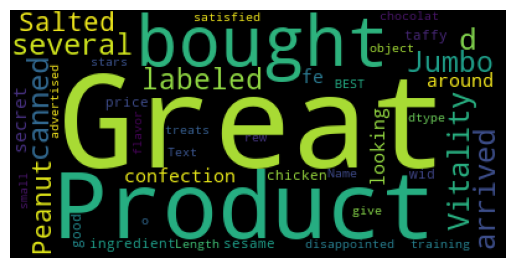

In [141]:
from wordcloud import WordCloud
from textwrap import wrap

text = data3['Text']

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()


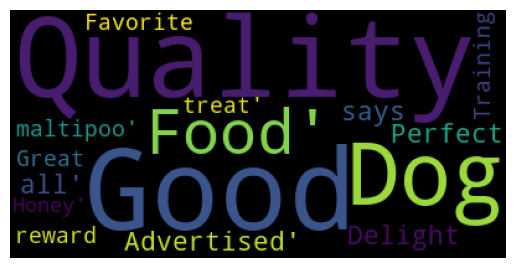

In [138]:
text = data3['Summary'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### Mostly Occured reveiws ...

### PROJECT COMPLETED 